In [ ]:
import os
from google.colab import drive

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 3: Copy kaggle.json to the correct location
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Step 4: Load the dataset
import pandas as pd

In [ ]:
# Define the path to your dataset
file_path = '/content/drive/MyDrive/kaggle/HomeC.csv'
data = pd.read_csv(file_path)
data = data[:-1] #delete last row  (NaNs)
data.info()

<ipython-input-6-1eb34816dec7>:3: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [ ]:
# Display first 5 rows to confirm loading
data.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

Data Exploration

Data Exploration

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.head(2)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633      0.12415   
1        0.020717        0.063817          0.444067      0.12400   

   Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
0          0.006983          0.013083         0.000417          0.00015   
1          0.006983          0.013117         0.000417          0.00015   

   Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
0              0.0    0.03135   0.001017        0.004067          0.001517   
1              0.0    0.03150   0.001017        0.004067          0.001650   

   Solar [kW]  temperature         icon  humidity  visibility summary  \
0    0.003483        36.14  clear-night      0.62        10.0   Clear   
1    0.003467        36.14  clear-night      0.62        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0

Preprocessing

In [ ]:
#Convert Unix timestamp to datetime, use sample frequency of minutes and make it dataframe index
data['time'] = pd.to_datetime(data['time'], unit='s')
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min'))
data = data.set_index('time')
data.head(2)

use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
time                                                                           
2016-01-01 05:00:00  0.932833  0.003483            0.932833         0.000033   
2016-01-01 05:01:00  0.934333  0.003467            0.934333         0.000000   

                     Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
time                                                                    
2016-01-01 05:00:00        0.020700        0.061917          0.442633   
2016-01-01 05:01:00        0.020717        0.063817          0.444067   

                     Fridge [kW]  Wine cellar [kW]  Garage door [kW]  \
time                                                                   
2016-01-01 05:00:00      0.12415          0.006983          0.013083   
2016-01-01 05:01:00      0.12400          0.006983          0.013117   

                     Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  \
time                                                                     
2016-01-01 05:00:00         0.000417          0.00015              0.0   
2016-01-01 05:01:00         0.000417          0.00015              0.0   

                     Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
time                                                                          
2016-01-01 05:00:00    0.03135   0.001017        0.004067          0.001517   
2016-01-01 05:01:00    0.03150   0.001017        0.004067          0.001650   

                     Solar [kW]  temperature         icon  humidity  \
time                                                                  
2016-01-01 05:00:00    0.003483        36.14  clear-night      0.62   
2016-01-01 05:01:00    0.003467        36.14  clear-night      0.62   

                     visibility summary  apparentTemperature  pressure  \
time                                                                     
2016-01-01 05:00:00        10.0   Clear                29.26   1016.91   
2016-01-01 05:01:00        10.0   Clear                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18  cloudCover        282.0              0.0   
2016-01-01 05:01:00       9.18  cloudCover        282.0              0.0   

                     dewPoint  precipProbability  
time                                              
2016-01-01 05:00:00      24.4                0.0  
2016-01-01 05:01:00      24.4                0.0

In [ ]:
data['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [ ]:
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [ ]:
#Delete '[kW]' in columns name, sum similar consumtions and delete 'summary' column
data.columns = [i.replace(' [kW]', '') for i in data.columns]
data['Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1) #We could also use the mean
data.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

#Replace invalid values in column 'cloudCover' with backfill method
data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

#Reorder columns
data = data[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn',
             'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility',
             'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
             'dewPoint', 'precipProbability']]
data.head(2)

use       gen  House overall  Dishwasher  \
time                                                                 
2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   

                     Home office   Fridge  Wine cellar  Garage door     Barn  \
time                                                                           
2016-01-01 05:00:00     0.442633  0.12415     0.006983     0.013083  0.03135   
2016-01-01 05:01:00     0.444067  0.12400     0.006983     0.013117  0.03150   

                         Well  Microwave  Living room   Furnace   Kitchen  \
time                                                                        
2016-01-01 05:00:00  0.001017   0.004067     0.001517  0.082617  0.000567   
2016-01-01 05:01:00  0.001017   0.004067     0.001650  0.084533  0.000567   

                        Solar  temperature  humidity  visibility  \
time                                                               
2016-01-01 05:00:00  0.003483        36.14      0.62        10.0   
2016-01-01 05:01:00  0.003467        36.14      0.62        10.0   

                     apparentTemperature  pressure  windSpeed  cloudCover  \
time                                                                        
2016-01-01 05:00:00                29.26   1016.91       9.18        0.75   
2016-01-01 05:01:00                29.26   1016.91       9.18        0.75   

                     windBearing  precipIntensity  dewPoint  precipProbability  
time                                                                            
2016-01-01 05:00:00        282.0              0.0      24.4                0.0  
2016-01-01 05:01:00        282.0              0.0      24.4                0.0

Energy correlations

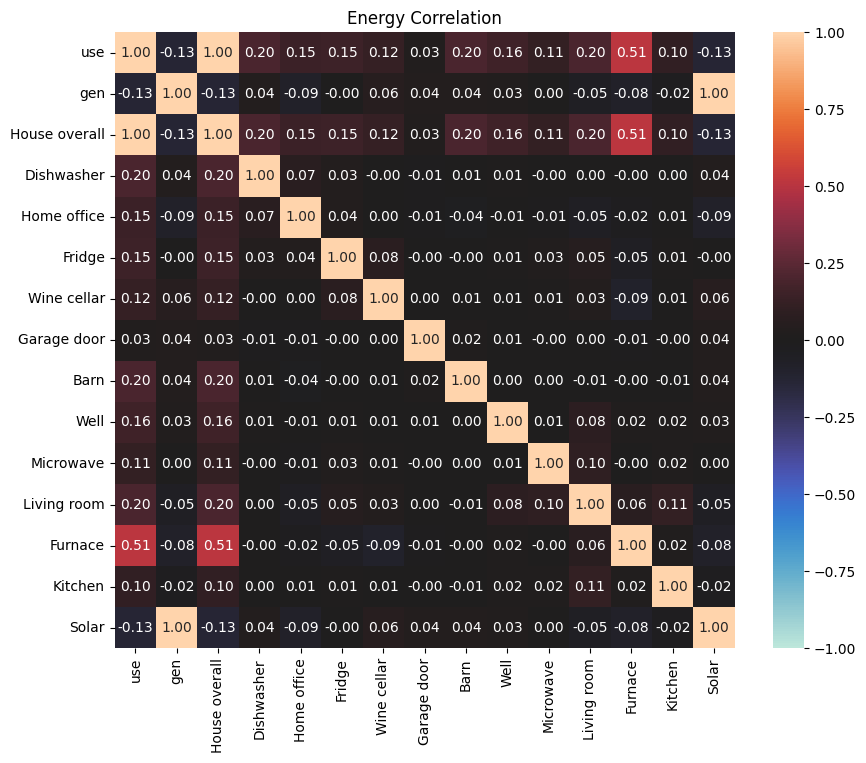

In [ ]:
#Checking Correlations (Only Energy features)
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(data[data.columns[0:15].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Energy Correlation', fontsize=12);

In [ ]:
#Some columns look so much correlated that they might be the same data
print(data['gen'].equals(data['Solar']))
print(data['use'].equals(data['House overall']))
#'True' if all elements in the columns coincide

True
True


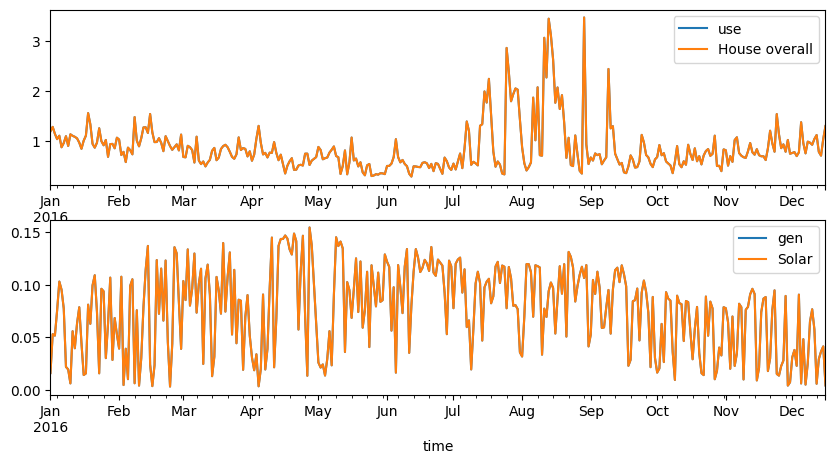

In [ ]:
#They are indeed the same data (overlaping perfectly)
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['use','House overall']].resample('D').mean().plot(ax=axes[0])
data[['gen','Solar']].resample('D').mean().plot(ax=axes[1]);

In [ ]:
#Drop the duplicate ones
data.drop(['use', 'gen'], axis=1, inplace=True)

Weather correlations

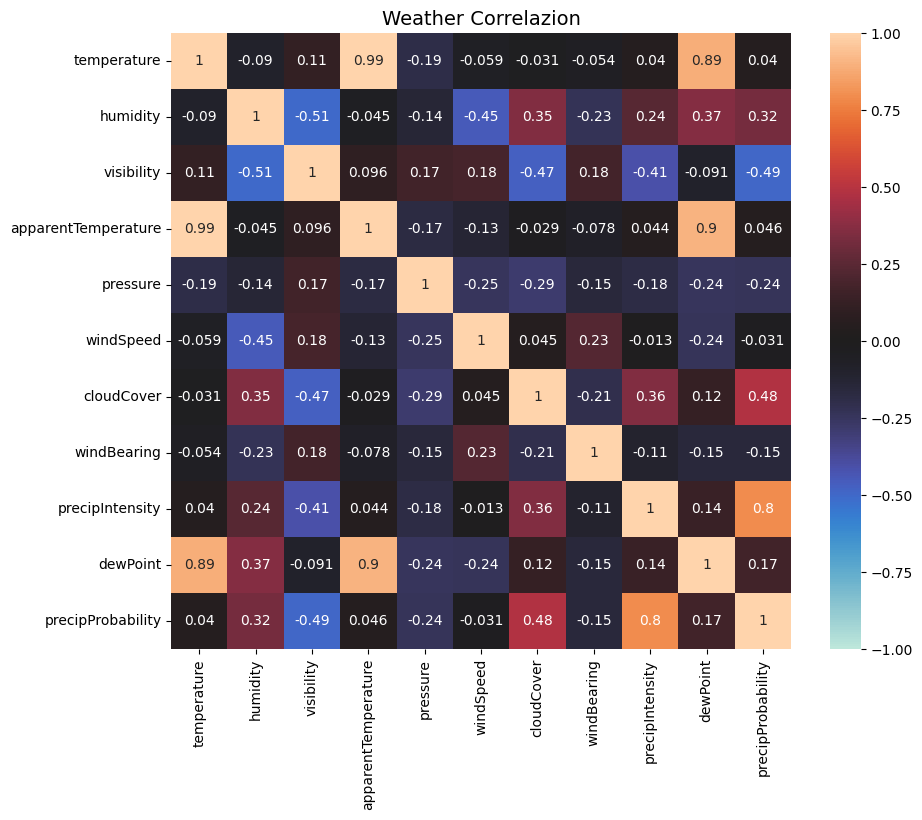

In [ ]:
#Checking Correlations (only weather features)
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(data[data.columns[13:].tolist()].corr(), annot=True, vmin=-1.0, vmax=1.0, center=0)
plt.title('Weather Correlazion', fontsize=14);

<Axes: xlabel='time'>

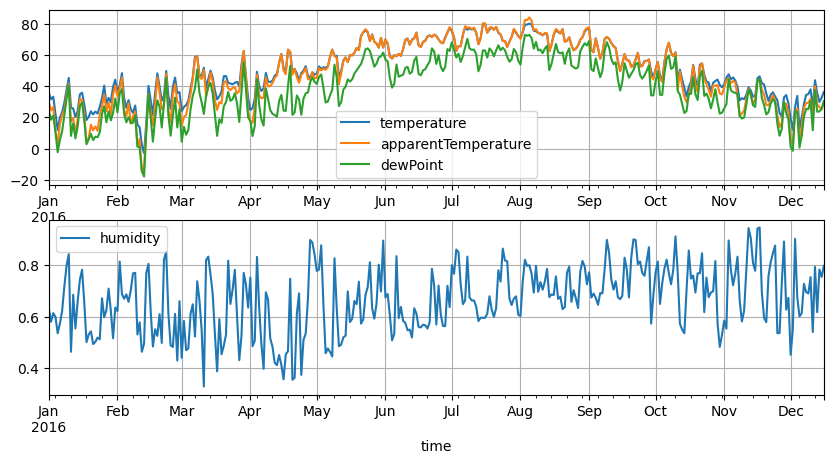

In [ ]:
#Let's check a few correlations about the weather data
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

Temperature difference

In [ ]:
# Check correlations between diff(apparentTemperature, temperature) and other weather columns
data['Tdiff'] = (data['apparentTemperature']-data['temperature'])
clima = data.columns[13:-1].tolist()
lista_corr = []
for i in clima:
  cor = data[i].corr(data['Tdiff'])
  lista_corr.append(cor)
data_corr = pd.DataFrame(list(zip(clima, lista_corr)), columns=['weather','Tdiff_corr']).set_index('weather')
data_corr

Tdiff_corr
weather                        
temperature            0.732693
humidity               0.188441
visibility            -0.018984
apparentTemperature    0.807018
pressure              -0.029497
windSpeed             -0.465971
cloudCover            -0.013172
windBearing           -0.180131
precipIntensity        0.055953
dewPoint               0.753312
precipProbability      0.068525

<Axes: xlabel='time'>

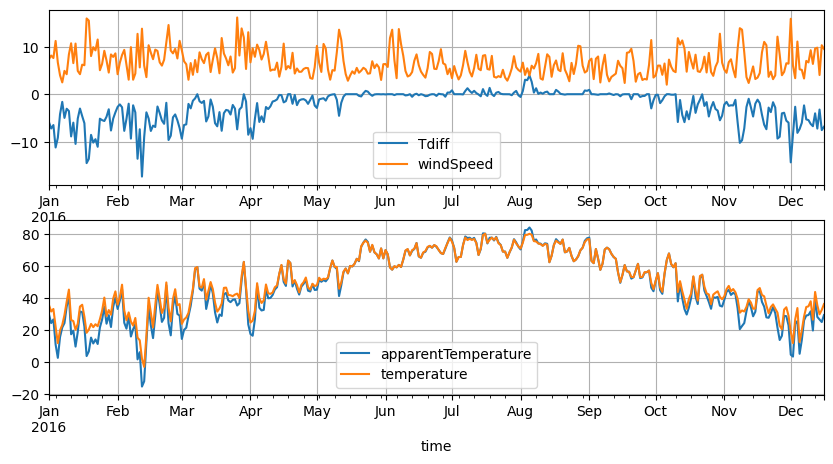

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['Tdiff','windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)

Visualizations

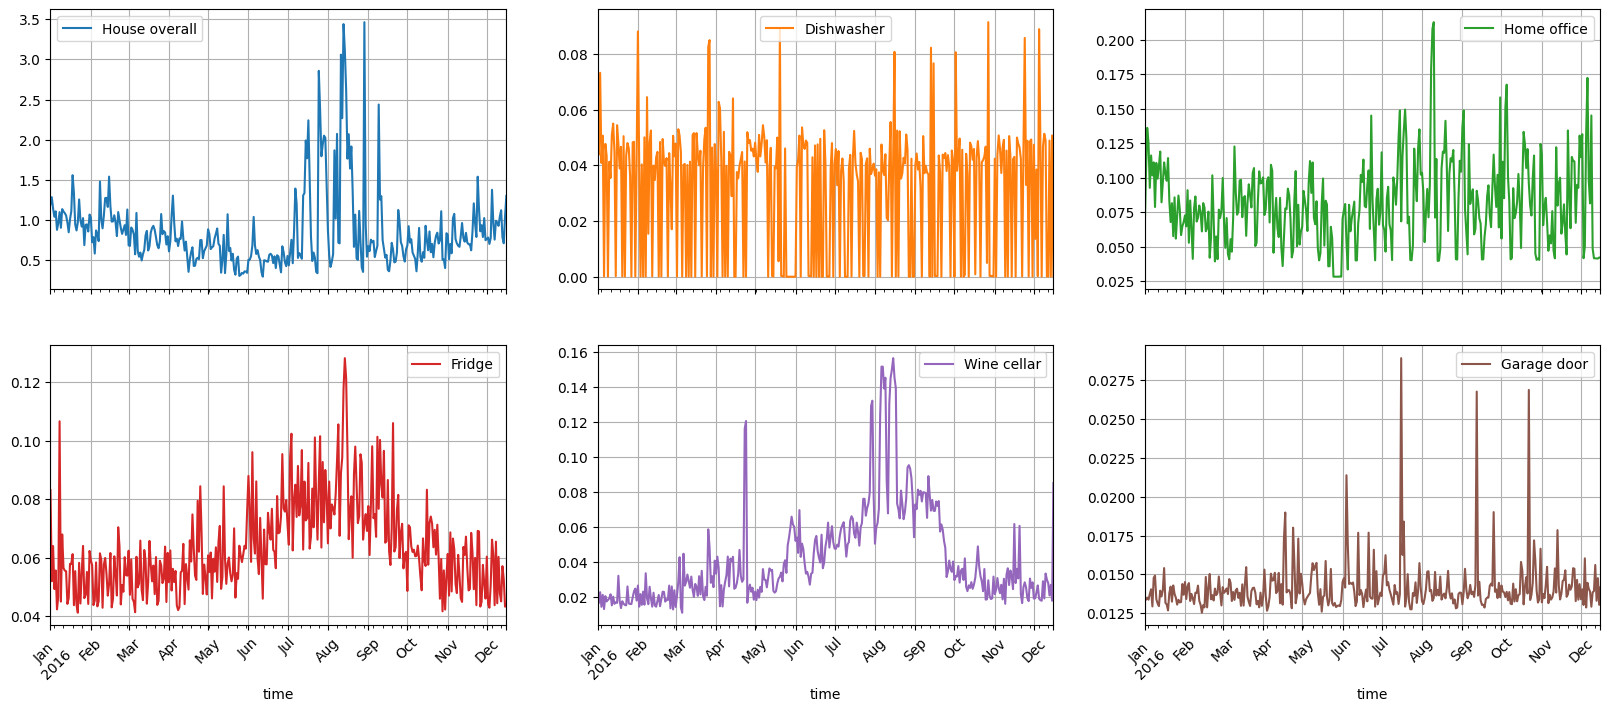

In [ ]:
#First 6 Energy columns (resample by day (rule=D or 1440Min))
data[data.columns[0:6].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 8),
                                                                grid=True, rot=45);

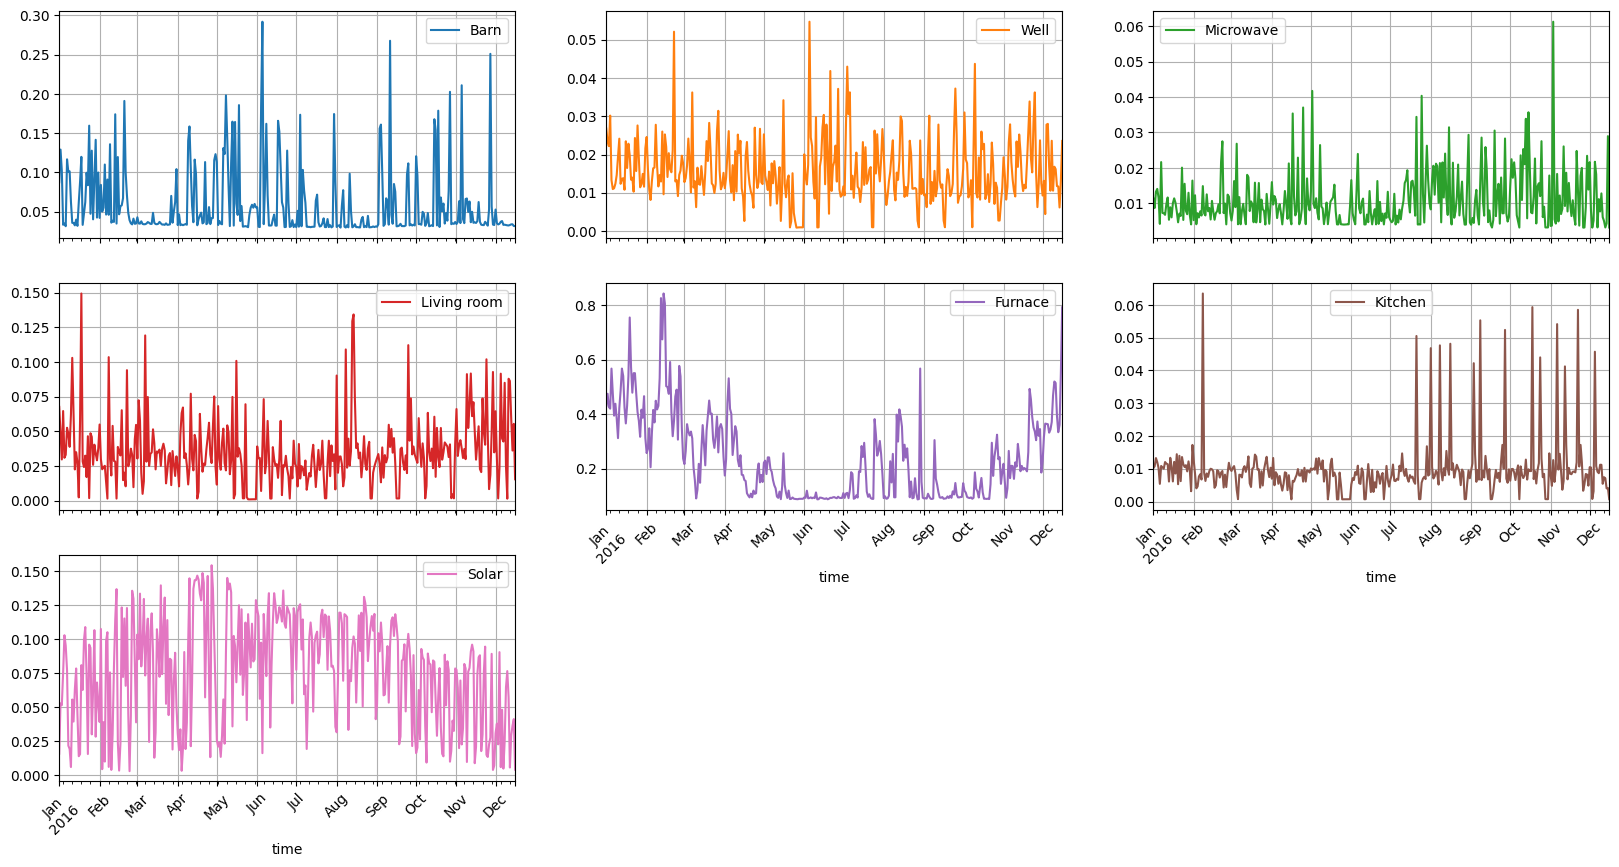

In [ ]:
# Rest of Energy columns
data[data.columns[6:13].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                                grid=True, rot=45, xlabel=None);

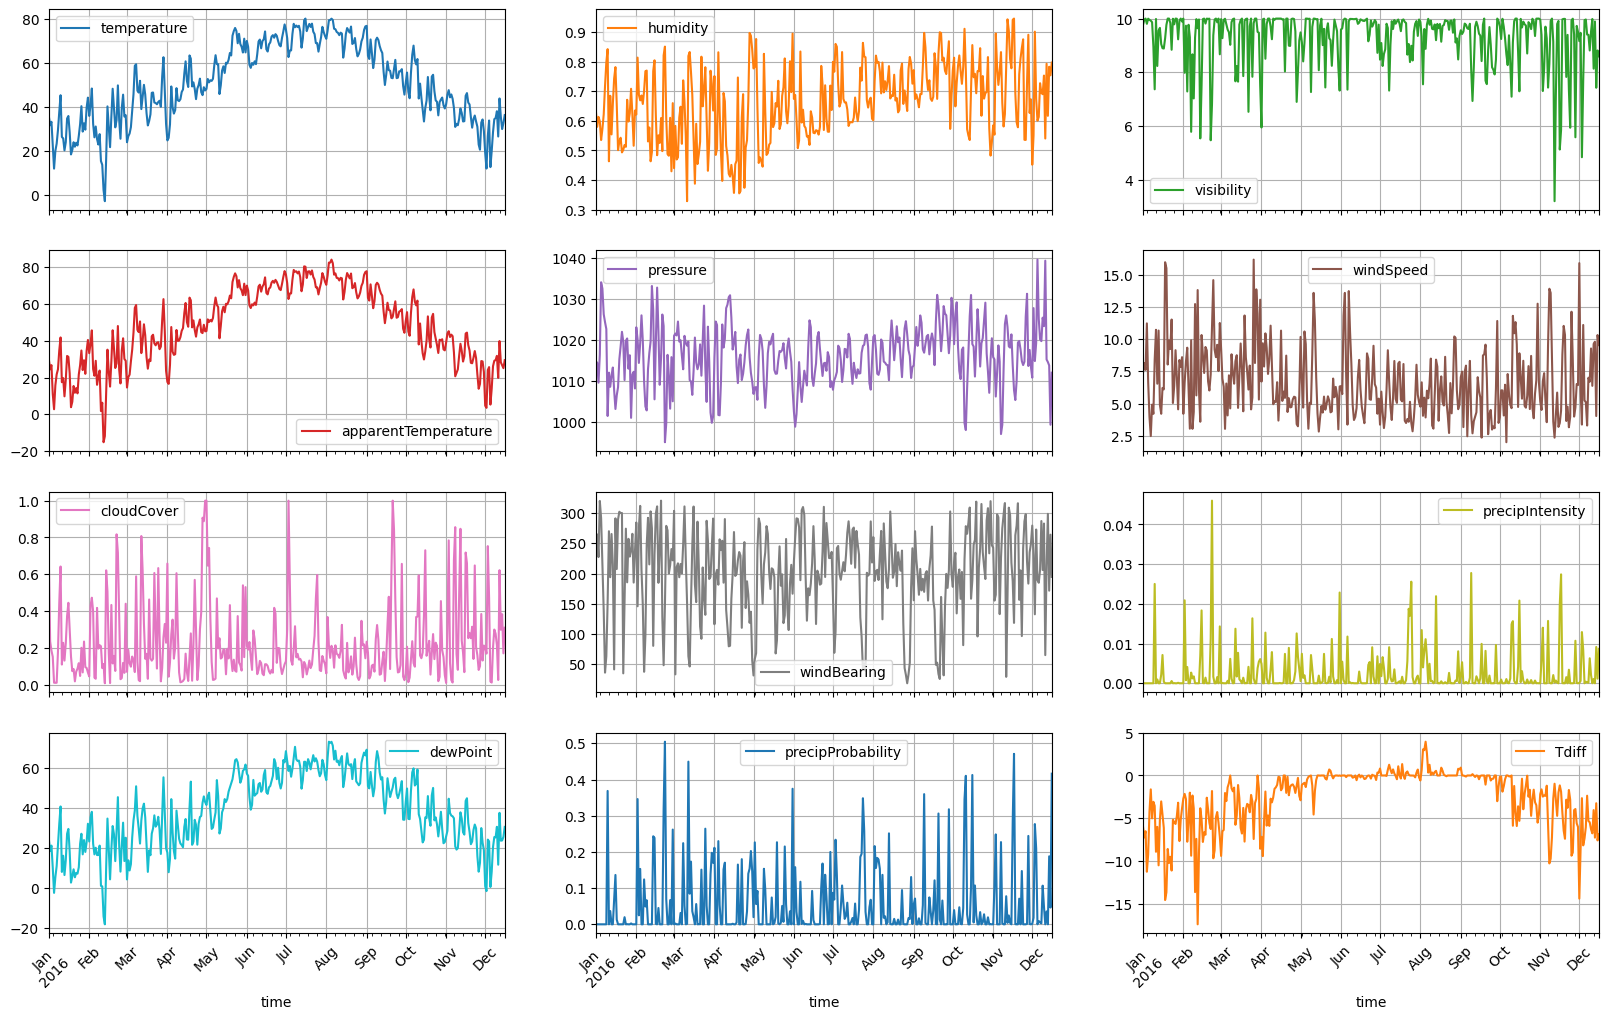

In [ ]:
#Visualize wheather data
data[data.columns[13:].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 12),
                                                                grid=True, rot=45, xlabel=None);

Groupings

In [ ]:
#Define new columns from datetime
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data.head(2)

House overall  Dishwasher  Home office   Fridge  \
time                                                                   
2016-01-01 05:00:00       0.932833    0.000033     0.442633  0.12415   
2016-01-01 05:01:00       0.934333    0.000000     0.444067  0.12400   

                     Wine cellar  Garage door     Barn      Well  Microwave  \
time                                                                          
2016-01-01 05:00:00     0.006983     0.013083  0.03135  0.001017   0.004067   
2016-01-01 05:01:00     0.006983     0.013117  0.03150  0.001017   0.004067   

                     Living room   Furnace   Kitchen     Solar  temperature  \
time                                                                          
2016-01-01 05:00:00     0.001517  0.082617  0.000567  0.003483        36.14   
2016-01-01 05:01:00     0.001650  0.084533  0.000567  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time                                                                       
2016-01-01 05:00:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:01:00      0.62        10.0                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18        0.75        282.0              0.0   
2016-01-01 05:01:00       9.18        0.75        282.0              0.0   

                     dewPoint  precipProbability  Tdiff  month  day weekday  \
time                                                                          
2016-01-01 05:00:00      24.4                0.0  -6.88      1    1  Friday   
2016-01-01 05:01:00      24.4                0.0  -6.88      1    1  Friday   

                     hour  minute  
time                               
2016-01-01 05:00:00     5       0  
2016-01-01 05:01:00     5       1

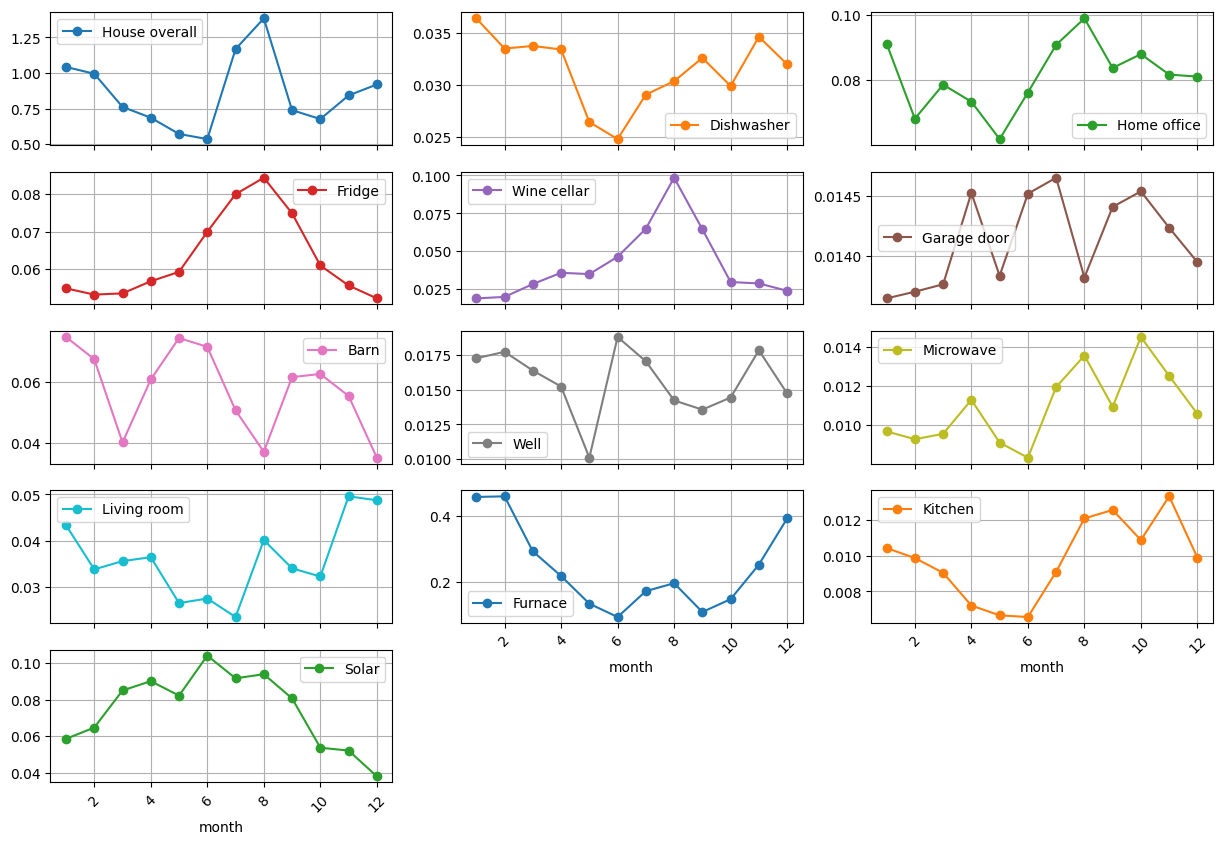

In [ ]:
##Averge consuption per month
mean_month = data.groupby('month').agg({i:'mean' for i in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Weekday

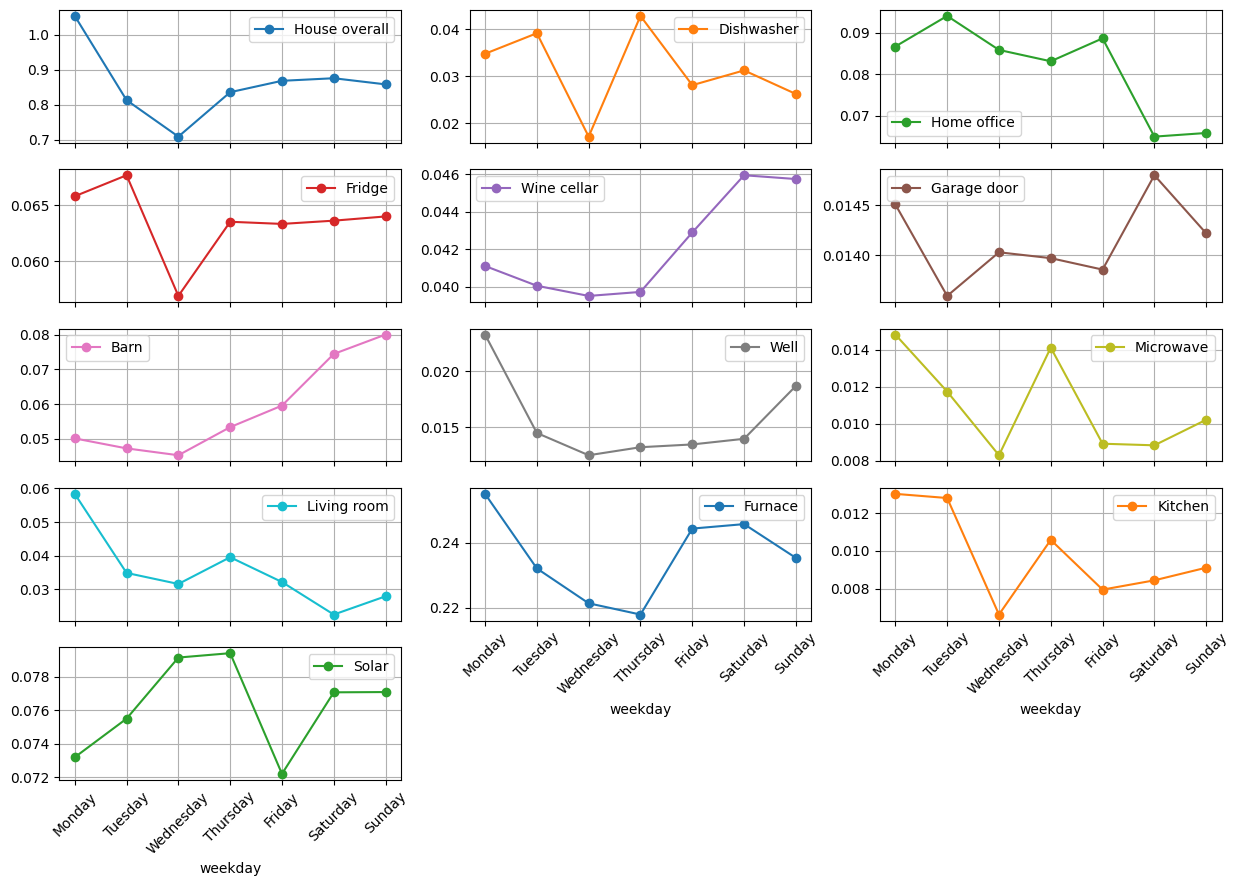

In [ ]:
#Averge consuption per day of the week
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = data.groupby('weekday').agg({i:'mean' for i in data.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Hour

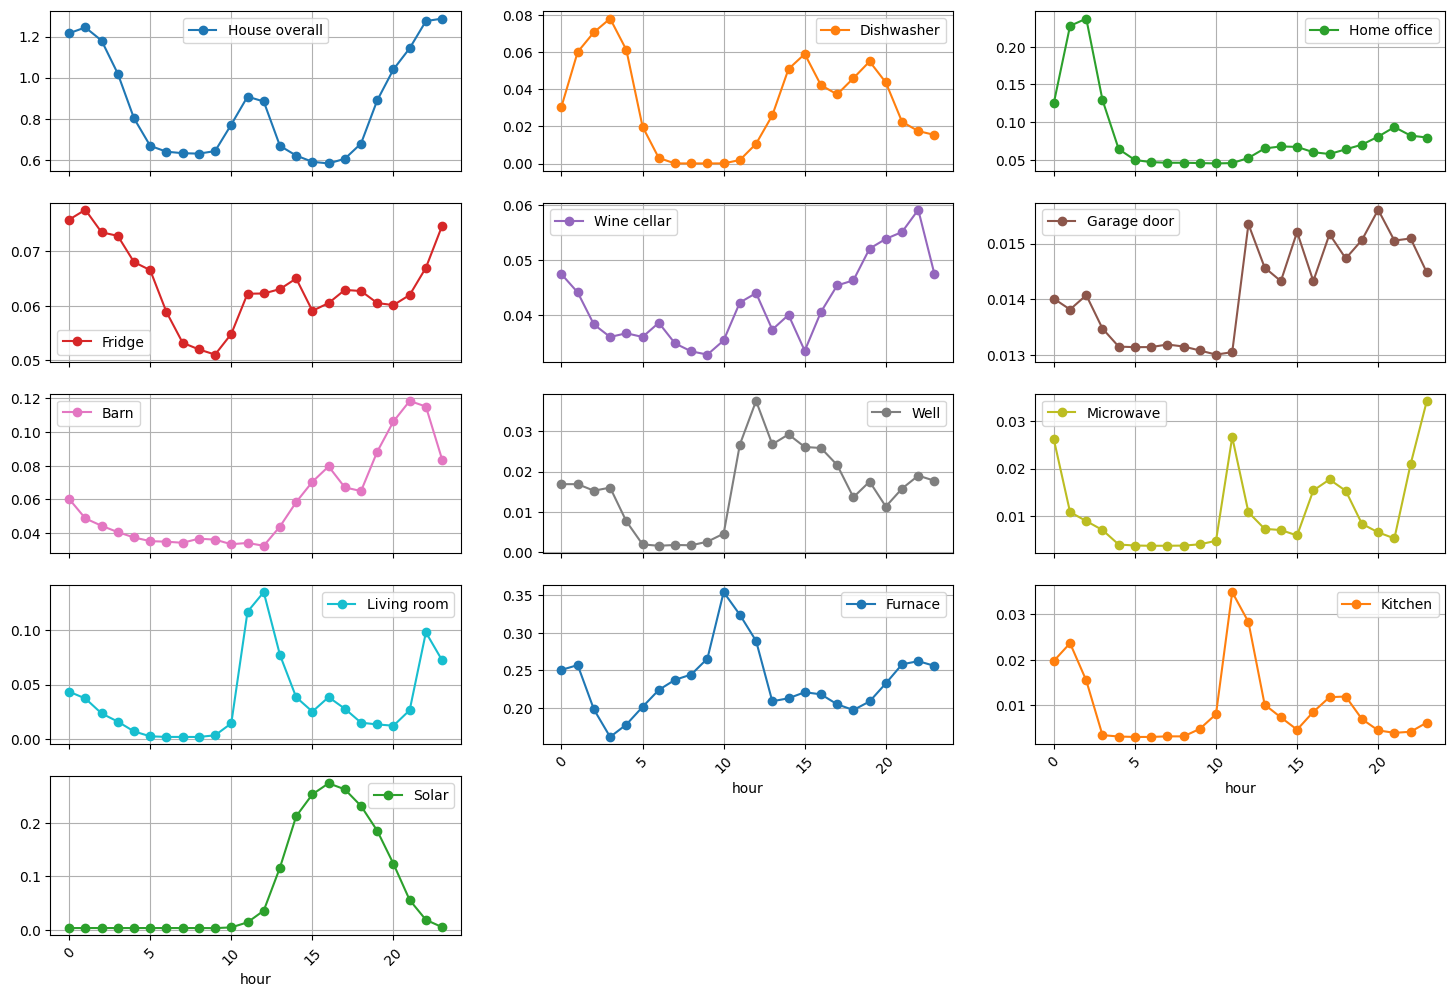

In [ ]:
#Averge consuption per hour
mean_hour = data.groupby('hour').agg({i:'mean' for i in data.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Energy-Weather Correlations

In [ ]:
consumtions = data.columns[0:13].tolist()
weather = data.columns[13:-5].tolist()
lists = [consumtions,]
for j in weather:
    correlations = []
    for i in consumtions:
        cor = data[i].corr(data[j])
        correlations.append(cor)
    lists.append(correlations)

names=['consumtions']
for i in weather:
    names.append(i+'_corr')
dataframe_corr = pd.DataFrame(np.column_stack(lists), columns=names).set_index('consumtions')

for i in dataframe_corr.columns[:].tolist():
    dataframe_corr[i] = dataframe_corr[i].apply(float)

In [ ]:
#Highlight correlations between energy and weather (red for corr > 0.1, orange for corr < -0.1)
dataframe_corr.style.applymap(lambda x: "background-color: red" if x > 0.1 else "background-color: orange" if x < -0.1 else "background-color: white")

More feature exploration

In [ ]:
#Check whether House overall corresponds to the sum of other comsumpitons (it seems not)
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)
data['Usage_diff'] = data['House overall'] - data['Sum_usage']
data.head(2)

House overall  Dishwasher  Home office   Fridge  \
time                                                                   
2016-01-01 05:00:00       0.932833    0.000033     0.442633  0.12415   
2016-01-01 05:01:00       0.934333    0.000000     0.444067  0.12400   

                     Wine cellar  Garage door     Barn      Well  Microwave  \
time                                                                          
2016-01-01 05:00:00     0.006983     0.013083  0.03135  0.001017   0.004067   
2016-01-01 05:01:00     0.006983     0.013117  0.03150  0.001017   0.004067   

                     Living room   Furnace   Kitchen     Solar  temperature  \
time                                                                          
2016-01-01 05:00:00     0.001517  0.082617  0.000567  0.003483        36.14   
2016-01-01 05:01:00     0.001650  0.084533  0.000567  0.003467        36.14   

                     humidity  visibility  apparentTemperature  pressure  \
time                                                                       
2016-01-01 05:00:00      0.62        10.0                29.26   1016.91   
2016-01-01 05:01:00      0.62        10.0                29.26   1016.91   

                     windSpeed  cloudCover  windBearing  precipIntensity  \
time                                                                       
2016-01-01 05:00:00       9.18        0.75        282.0              0.0   
2016-01-01 05:01:00       9.18        0.75        282.0              0.0   

                     dewPoint  precipProbability  Tdiff  month  day weekday  \
time                                                                          
2016-01-01 05:00:00      24.4                0.0  -6.88      1    1  Friday   
2016-01-01 05:01:00      24.4                0.0  -6.88      1    1  Friday   

                     hour  minute  Sum_usage  Usage_diff  
time                                                      
2016-01-01 05:00:00     5       0   0.708017    0.224817  
2016-01-01 05:01:00     5       1   0.711500    0.222833

<Axes: xlabel='time'>

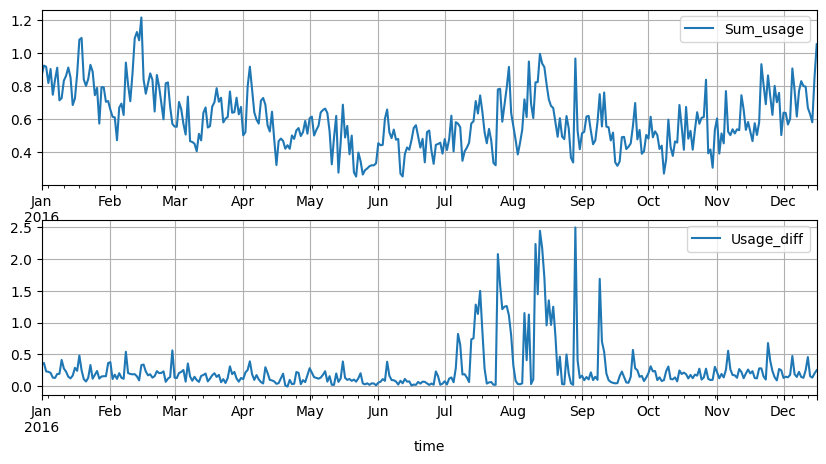

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data['Sum_usage'].resample('D').mean().plot(ax=axes[0], grid=True, legend=True)
data['Usage_diff'].resample('D').mean().plot(ax=axes[1], grid=True, legend=True)

Baseline model

Moving Average

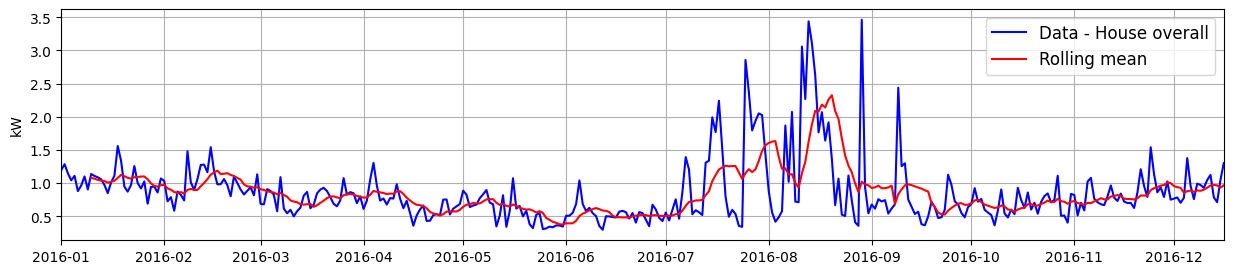

In [ ]:
# Data resampling by day
data_daily = data['House overall'].resample('d').mean()
#Define la moving average
baseline = data_daily.rolling(window=10).mean()
#Plot
plt.figure(figsize=(15,3))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(baseline, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.grid()

MSE: 0.071
RMSE: 0.266
MAE: 0.177
MAPE: 0.236
MASE: 0.721
R^2 score: 0.077
R^2 manual: 0.0767596381423179


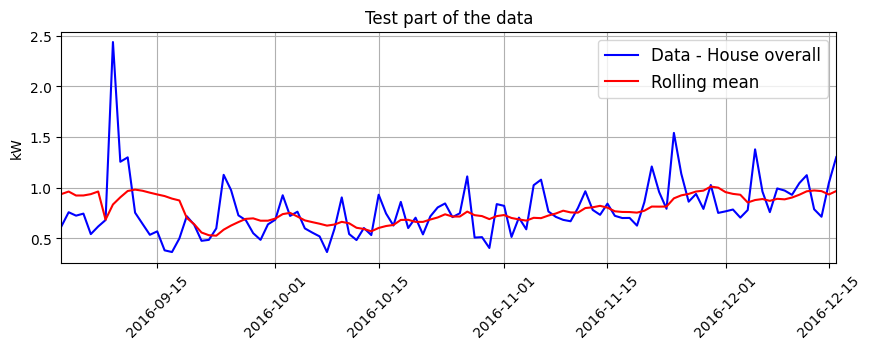

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Split time series and take the last 30% of it, like if it was the test part of the model
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
#take moving average for this portion of the data
baseline_test = baseline.loc[test.index[0]:]
#Plot
plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - House overall')
plt.plot(baseline_test, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);

# calculate error
print('MSE: %.3f' % (mean_squared_error(test, baseline_test)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, baseline_test))

print('R^2 manual:', 1-(sum((baseline_test-test)**2)/sum((np.mean(test)-test)**2)))

Persistence Algorithm

RMSE: 0.304
MAE: 0.194
MAPE: 0.233
MASE: 0.790
R^2 score: -0.203


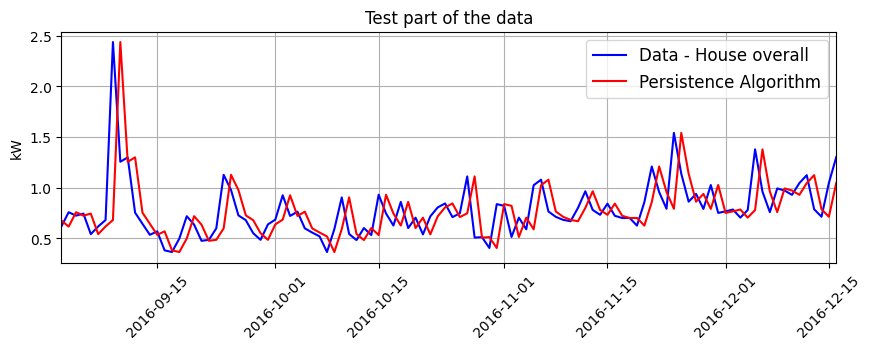

In [ ]:
baseline = data_daily.shift(1)
baseline = baseline.dropna()
data_actual = data_daily.iloc[1:]
size = int(len(data_actual)*0.7)
train = data_daily[:size]
test = data_actual[size:]
baseline_test = baseline.loc[test.index[0]:]

#Plot
plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - House overall')
plt.plot(baseline_test, c='red', label='Persistence Algorithm')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);

# calcolo errore
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test ))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, baseline_test))

ARIMA

Stationarity check

(None, None)

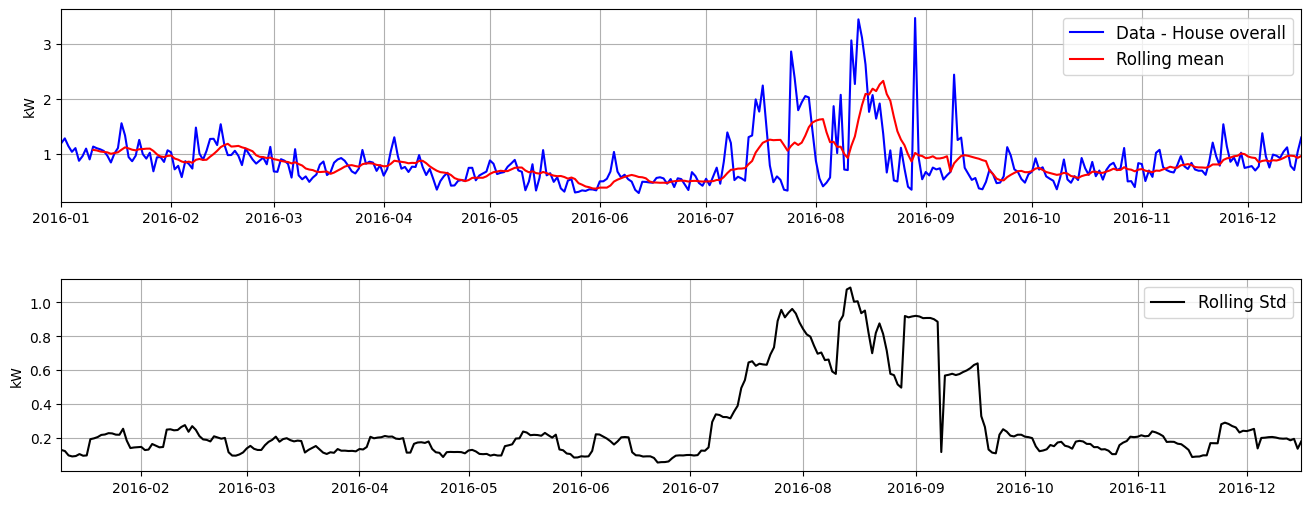

In [ ]:
data_daily = data['House overall'].resample('d').mean()
rollingMEAN = data_daily.rolling(window=10).mean()
rollingSTD = data_daily.rolling(window=10).std()
#Plot
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,6))
plt.subplots_adjust(hspace=0.4)
ax1.plot(data_daily, c='blue',label='Data - House overall')
ax1.plot(rollingMEAN, c='red', label='Rolling mean')
ax2.plot(rollingSTD, c='black',label = 'Rolling Std')

ax1.legend(fontsize=12), ax2.legend(fontsize=12)
ax1.set_ylabel('kW'), ax2.set_ylabel('kW')
ax1.margins(x=0), ax2.margins(x=0)
ax1.grid(), ax2.grid()

In [ ]:
from statsmodels.tsa.stattools import adfuller

resultDFtest = adfuller(data_daily, autolag='AIC')
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key1, value1 in resultDFtest[4].items():
    Out['Critical Value (%s)'%key1] = value1

print('DICK-FULLER RESULTS: \n\n{}'.format(Out))

DICK-FULLER RESULTS: 

Test Statistic                  -2.988003
p-value                          0.036030
#Lags Used                      10.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


ACF e PAC

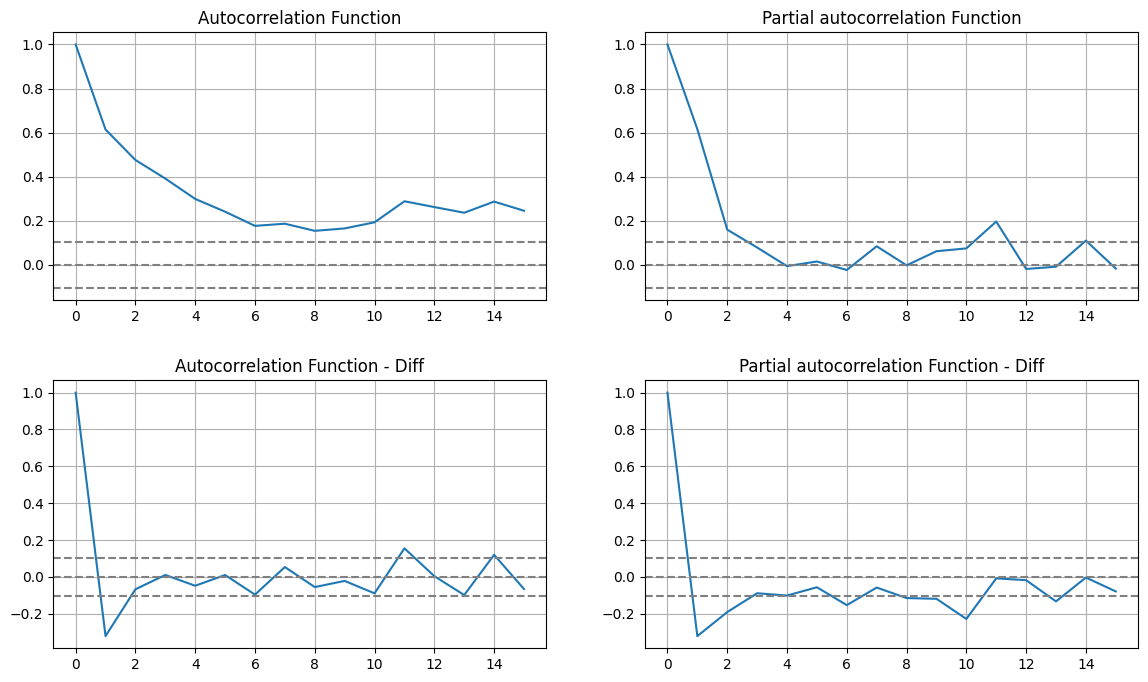

In [ ]:
data_daily_diff = data_daily-data_daily.shift(1)
data_daily_diff = data_daily_diff.dropna()

#AUTOCORRELATION FUNCTION AND PARTIAL AUTOCORRELATION FUNCTION PLOTS
from statsmodels.graphics.tsaplots import acf, pacf
ACF = acf(data_daily, nlags=15)
PACF = pacf(data_daily, nlags=15, method='ols') #ols - ordinary least squared
ACF1 = acf(data_daily_diff, nlags=15)
PACF1 = pacf(data_daily_diff, nlags=15, method='ols') #ols - ordinary least squared

def plots_corr(ax,func,dat,title):
    ax.plot(func)
    ax.axhline(y=0, linestyle='--',c='gray')
    ax.axhline(y=-1.96/np.sqrt(len(dat)),linestyle='--',c='gray')
    ax.axhline(y=1.96/np.sqrt(len(dat)),linestyle='--',c='gray')
    ax.grid()
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,8))
plt.subplots_adjust(hspace=0.3)
plots_corr(ax1, ACF, data_daily,'Autocorrelation Function')
plots_corr(ax2, PACF, data_daily,'Partial autocorrelation Function')
plots_corr(ax3, ACF1, data_daily_diff,'Autocorrelation Function - Diff')
plots_corr(ax4, PACF1, data_daily_diff,'Partial autocorrelation Function - Diff')

Training

In [ ]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

Number of points in series: 351
Number of points in train: 245
Number of points in test: 106


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,1))
#model = sm.tsa.statespace.SARIMAX(train, order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  258.4623694304185


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  245
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -125.231
Date:                Wed, 28 May 2025   AIC                            258.462
Time:                        07:24:13   BIC                            272.451
Sample:                    01-01-2016   HQIC                           264.096
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4590      0.051      9.051      0.000       0.360       0.558
ar.L2          0.0999      0.037      2.667      0.008       0.026       0.173
ma.L1         -0.9438      0.026    -35.670      0.0

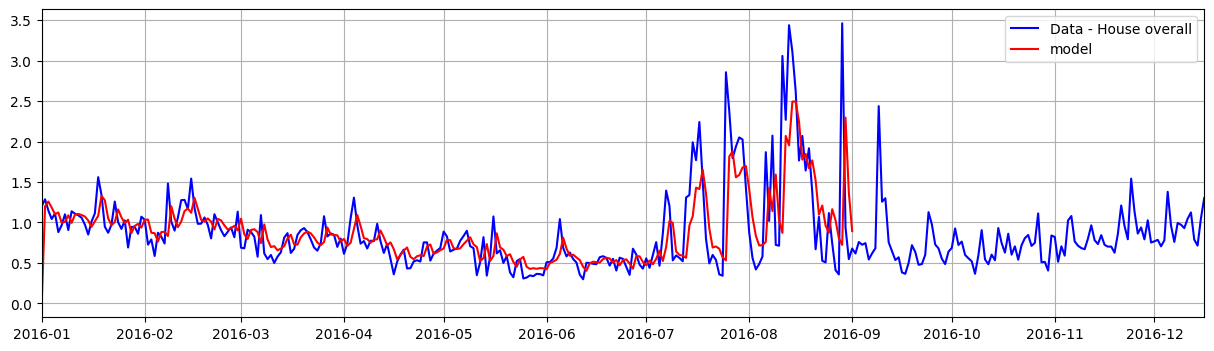

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

Residuals

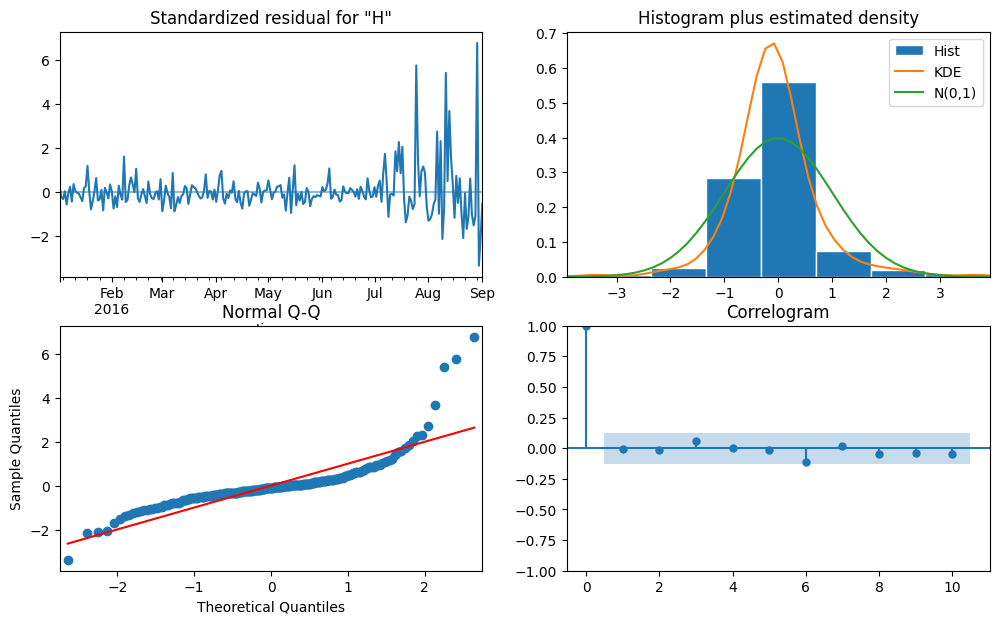

In [ ]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

Single Forecast

MSE: 0.259
RMSE: 0.509
MAE: 0.463
MAPE: 0.722
MASE: 1.886
R^2 score: -2.379


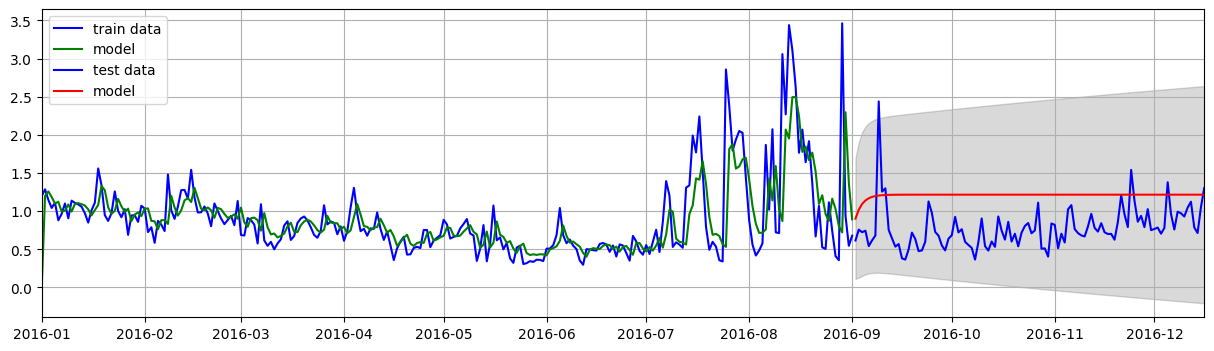

In [ ]:
new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

Time series cross validation (rolling forecast)

In [ ]:
n = 1
X = data_daily.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
predictions = list()
confidence = list()
history = [x for x in train]
# walk-forward validation
for t in range(0,len(test),n):
    model = ARIMA(history, order=(2,0,1))
    model_fit = model.fit()
    output = model_fit.forecast(n).tolist()
    conf = model_fit.get_forecast(n).conf_int(0.05)
    predictions.extend(output)
    confidence.extend(conf)
    obs = test.tolist()[t:t+n]
    history = history[n:]
    history.extend(obs);
conf_int =  np.vstack(confidence)

Test

In [ ]:
# plot forecasts against actual outcomes
m = len(predictions) - len(test)
index_extended = data_daily[size:].index.union(data_daily[size:].index.shift((m))[-(m):])
predictions_series = pd.Series(predictions, index=index_extended)
confidence = pd.DataFrame(conf_int, columns=['lower', 'upper'])
plt.figure(figsize=(15,4))
plt.plot(data_daily[:size], c='green',label='train data')
plt.plot(data_daily[size:], c='blue',label='test data')
plt.plot(predictions_series, c='red', label='predictions')
plt.fill_between(predictions_series.index, confidence['lower'],
                 confidence['upper'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)

# evaluate forecasts
print('MSE: %.5f' % (mean_squared_error(test, predictions[:len(test)])))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions[:len(test)])))
MAE = mean_absolute_error(test, predictions[:len(test)])
MAPE = np.mean(np.abs(predictions[:len(test)] - test)/np.abs(test))
MASE = np.mean(np.abs(test - predictions[:len(test)]))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, predictions[:len(test)]))

SARIMAX with exogs

In [56]:
data_exog = pd.get_dummies(data, columns = ['month','weekday'] , prefix = ['month','weekday'])

In [57]:
ext_var_list = ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6','month_7', 'month_8', 'month_9',
                'month_10', 'month_11', 'month_12','weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
                'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday','weekday_Wednesday']
exog_part = data_exog[ext_var_list]
exog_part = exog_part.resample('d').mean()

Train

In [58]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]

model = sm.tsa.statespace.SARIMAX(endog=train, exog=exog_part[:size], order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Akaike information criterion:  257.1608766831631


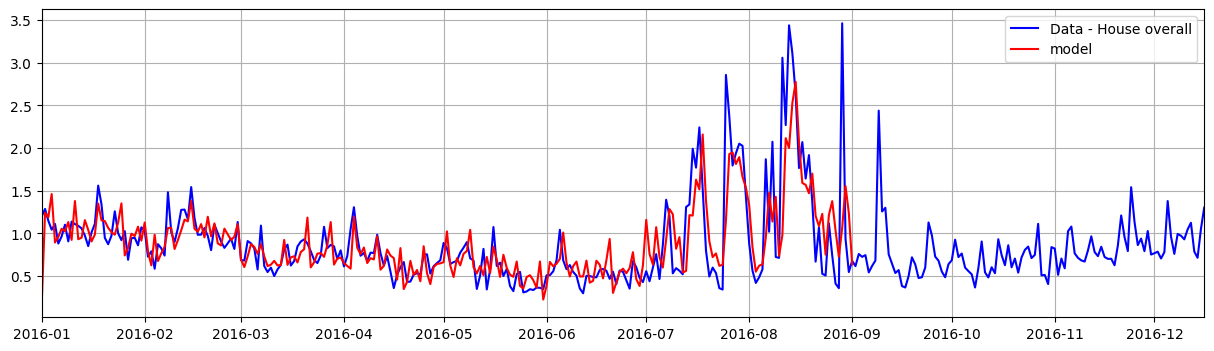

In [59]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
#print(model_fit.summary())

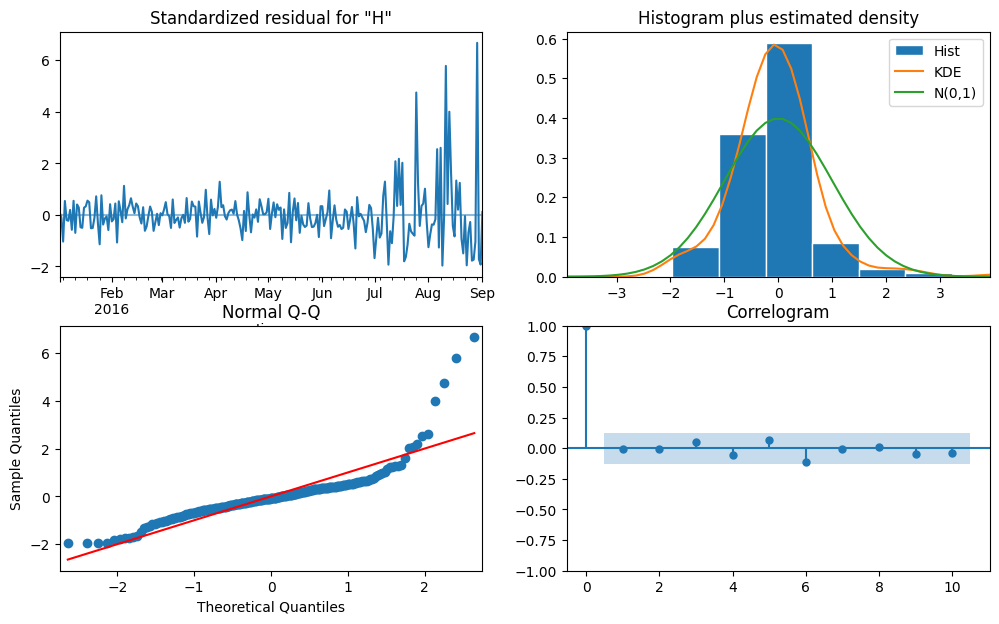

In [60]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

Test

MSE: 0.100
RMSE: 0.317
MAE: 0.242
MAPE: 0.361
MASE: 0.987
R^2 score: -0.310


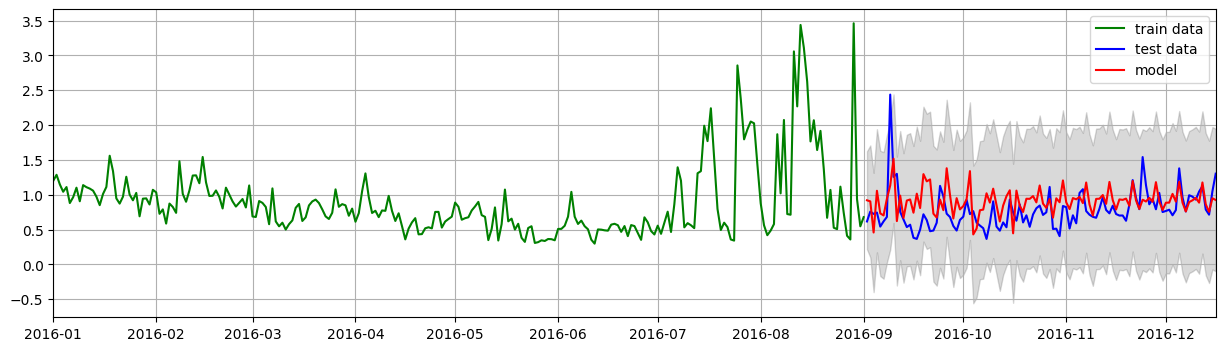

In [61]:
forecast = model_fit.forecast(len(test), exog = exog_part[size:])
confidence = model_fit.get_forecast(len(test), exog = exog_part[size:]).conf_int(0.05)
#forecast = model_fit.predict(246, 351)
plt.figure(figsize=(15,4))
plt.plot(train, c='green',label='train data')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);
# calcolo errore
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

LSTM Univariate

In [62]:
#Sequencing function
def sampling(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence)-1:
            break
        x, y = sequence[i:sam], sequence[sam]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [63]:
#Manual MinMax Scaler function and inverse
def MinMaxScale(t, t_or):
    return (t-t_or.min())/(t_or.max()-t_or.min())

def InverseMinMaxScale(t, t_or):
    return t*(t_or.max()-t_or.min())+t_or.min()

Train, Validation, Test split attempt

Training size: 245
Training + Validation size: 298


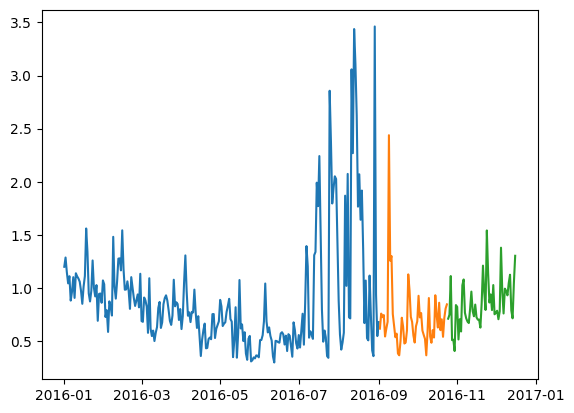

In [64]:
n_steps = 10
X, Y = sampling(data_daily.tolist(), n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
size = int(len(data_daily)*0.7)
size2 = int(((len(data_daily)-size)/2)+size)
X_train, Y_train = X[:size], Y[:size]
X_val, Y_val = X[size:size2], Y[size:size2]
X_test, Y_test = X[size2:], Y[size2:]
print('Training size:', size)
print('Training + Validation size:', size2)
plt.plot(data_daily[:size])
plt.plot(data_daily[size:size2])
plt.plot(data_daily[size2:])
#for i in range(len(X)):
 #   print(X[i], Y[i])

Training and Validation loss comparison

In [65]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Bidirectional

In [66]:
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
#Loop through different epochs to check the loss for Training and Validation
mse_train = list()
mse_val = list()
for epoch in range(0,100,5):
    model_fit = model.fit(X_train, Y_train, epochs=epoch, verbose=0)
    Train_pred = model.predict(X_train, verbose=0)
    Val_pred = model.predict(X_val, verbose=0)
    mse_t = mean_squared_error(Train_pred, Y_train)
    mse_v = mean_squared_error(Val_pred, Y_val)
    mse_train.append(mse_t)
    mse_val.append(mse_v)

Train MSE minimum: 0.03429480686516031
Validation MSE minimum: 0.042997496516205776


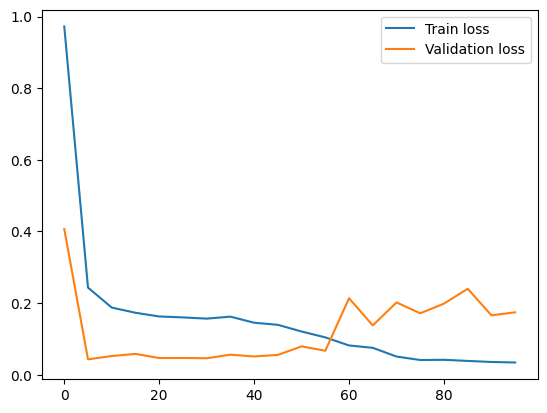

In [68]:
# Plot the loss results
plt.plot(range(0,100,5), mse_train, label='Train loss')
plt.plot(range(0,100,5), mse_val,  label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(mse_train))
print('Validation MSE minimum:', min(mse_val))

Model

In [69]:
n_steps = 2
X, Y = sampling(data_daily.tolist(), n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
size = int(len(data_daily)*0.7)
X_train_or, Y_train_or = X[:size], Y[:size]
X_test_or, Y_test_or = X[size:], Y[size:]

#If we want to normalize with MinMax, change names above adding _or to retain the originals, and apply the below

X_train = MinMaxScale(X_train_or, data_daily)
Y_train = MinMaxScale(Y_train_or, data_daily)
X_test = MinMaxScale(X_test_or, data_daily)
Y_test = MinMaxScale(Y_test_or, data_daily)


n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
#model.add(LSTM(50, activation='relu', return_sequences = True))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model_fit = model.fit(X_train, Y_train, epochs=200, verbose=0)

Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)
print('MSE Train', mean_squared_error(Train_pred, Y_train))

MSE Train 0.01580108946391104


Train MSE minimum: 0.015767576172947884


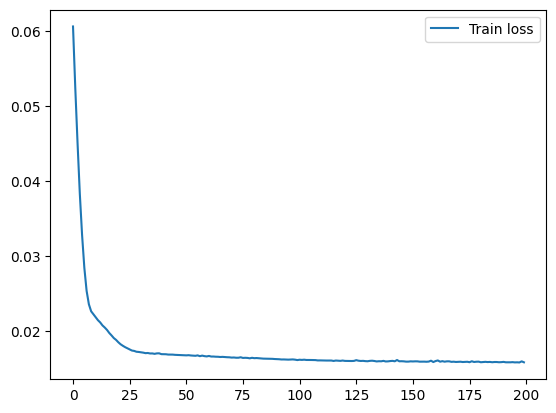

In [70]:
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))
#print('Validation MSE minimum:', min(model_fit.history['val_loss']))

In [71]:
#In case we normalized before, to restore the original scale apply this. In the metrics calculations below you'll
#have to change Y_test to Y_test_or.

Y_pred = InverseMinMaxScale(Y_pred, data_daily)

MSE: 0.07102
RMSE: 0.26650
MAE: 0.184
MAPE: 0.324
MASE: 0.987
R^2 score: 0.087


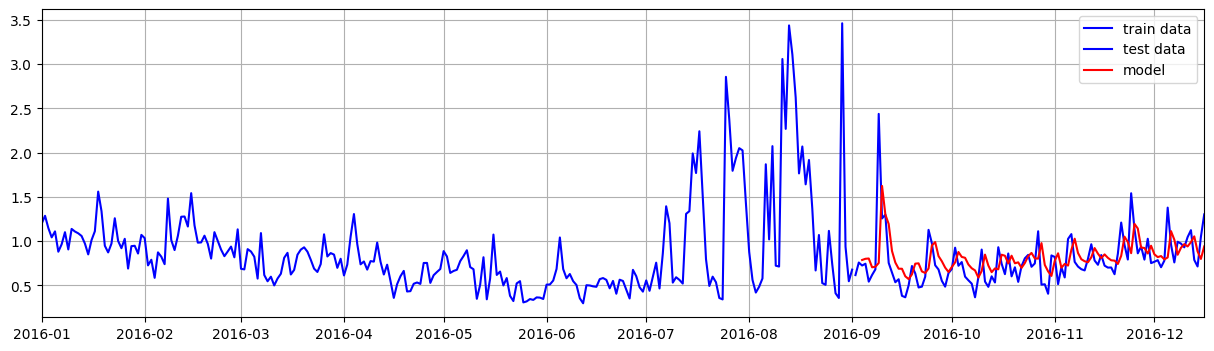

In [72]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data_daily[size+n_steps:].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily[:size].index)

#Plot
plt.figure(figsize=(15,4))
plt.plot(data_daily[:size], c='blue',label='train data')
#plt.plot(Train_pred_series, c='green',label='train data')
plt.plot(data_daily[size:], c='blue',label='test data')
plt.plot(Y_pred_series, c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);

# calcolo errore
print('MSE: %.5f' % (mean_squared_error(Y_pred, Y_test_or)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test_or)))
MAE = mean_absolute_error(Y_test_or, Y_pred)
MAPE = np.mean(np.abs(Y_pred - Y_test_or)/np.abs(Y_test_or))
#MASE = np.mean(np.abs(Y_test - Y_pred))/(np.abs(np.diff(X_train)).sum()/(len(X_train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(Y_test_or, Y_pred))

In [73]:
print('Predictions', Y_pred[:10].flatten().tolist())
print()
print('Test', Y_test_or[:10].tolist())

Predictions [0.786551833152771, 0.799946665763855, 0.8033008575439453, 0.7039162516593933, 0.7094690799713135, 0.7527477145195007, 1.6234897375106812, 1.3000537157058716, 1.1932474374771118, 0.887892484664917]

Test [0.723916504625, 0.7439559259201388, 0.54159091435625, 0.6169612963173611, 0.6806124074041667, 2.438020173617361, 1.255991770832639, 1.299397662042361, 0.75348300925, 0.6436788541729167]


LSTM Multivariate

In [74]:
data.columns

Index(['House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Furnace',
       'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Tdiff', 'month', 'day', 'weekday', 'hour', 'minute', 'Sum_usage',
       'Usage_diff'],
      dtype='object')

In [75]:
#Reduce size of dataframe with only the columns we are interested in
data_daily = data[['House overall', 'Furnace', 'Living room', 'Barn', 'temperature', 'humidity',
                   'apparentTemperature', 'pressure', 'cloudCover','windBearing', 'precipIntensity',
                   'dewPoint', 'precipProbability']]
#Rescale
data_daily = data_daily.resample('D').mean()
#Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_daily[data_daily.columns[1:]] = scaler.fit_transform(data_daily[data_daily.columns[1:]])
scaler_target = MinMaxScaler(feature_range=(0, 1))
data_daily[['House overall']] = scaler_target.fit_transform(data_daily[['House overall']])

size = int(len(data_daily)*0.7)
data_daily_train = data_daily[:size]
data_daily_test = data_daily[size:]
X_train, X_test = [], []
Y_train, Y_test = [], []
n_past=1
n_future=1
for i in range(n_past, len(data_daily_train)-n_future+1):
    X_train.append(data_daily_train.iloc[i-n_past:i, 0:data_daily.shape[1]])
    Y_train.append(data_daily_train.iloc[i+n_future-1:i+n_future, 0])
for i in range(n_past, len(data_daily_test)-n_future+1):
    X_test.append(data_daily_test.iloc[i-n_past:i, 0:data_daily_test.shape[1]])
    Y_test.append(data_daily_test.iloc[i+n_future-1:i+n_future, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

X_train shape (244, 1, 13)
X_test shape (105, 1, 13)
Y_train shape (244, 1)
Y_test shape (105, 1)


In [76]:
model = Sequential()
model.add(LSTM(25, activation='relu', return_sequences = False, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(LSTM(50, activation='relu', return_sequences = True))
#model.add(LSTM(15, activation='relu', return_sequences = False))
#model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 25)             │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,926 (15.34 KB)

 Trainable params: 3,926 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model_fit = model.fit(X_train, Y_train, epochs=60, verbose=0)

Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)

Train MSE minimum: 0.016300585120916367


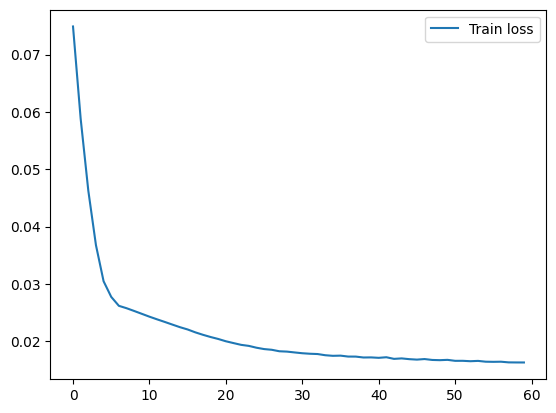

In [78]:
plt.plot(model_fit.history['loss'], label='Train loss')
#plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.legend()
print('Train MSE minimum:', min(model_fit.history['loss']))
#print('Validation MSE minimum:', min(model_fit.history['val_loss']))

In [79]:
#Invert scaling
data_daily[['House overall']] = scaler_target.inverse_transform(data_daily[['House overall']])
Y_pred = scaler_target.inverse_transform(Y_pred)
Train_pred = scaler_target.inverse_transform(Train_pred)

np.float64(0.15827839283845954)

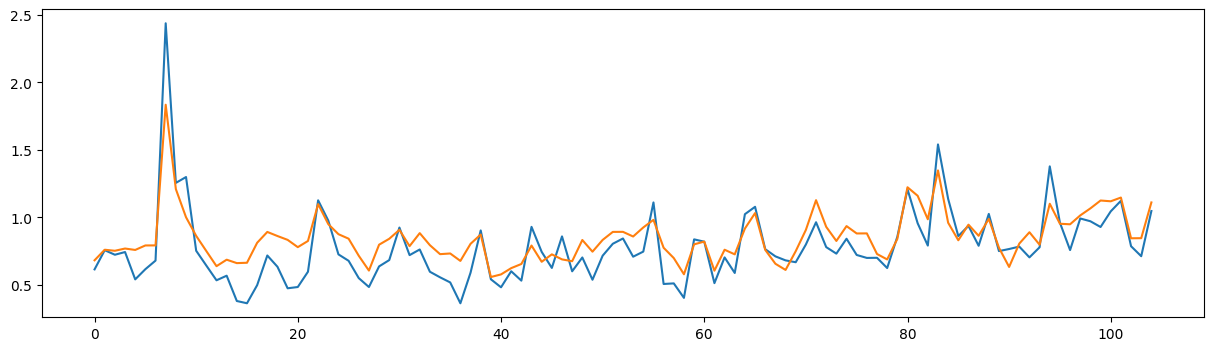

In [80]:
plt.figure(figsize=(15,4))
plt.plot(data_daily[['House overall']][size:-1].values)
plt.plot(Y_pred)
np.sqrt(mean_squared_error(Y_pred[:,0].tolist(), data_daily[['House overall']][size:-1].values))

MSE: 0.02505
RMSE: 0.15828
MAE: 0.126
MAPE: 0.190
R^2 score: 0.665


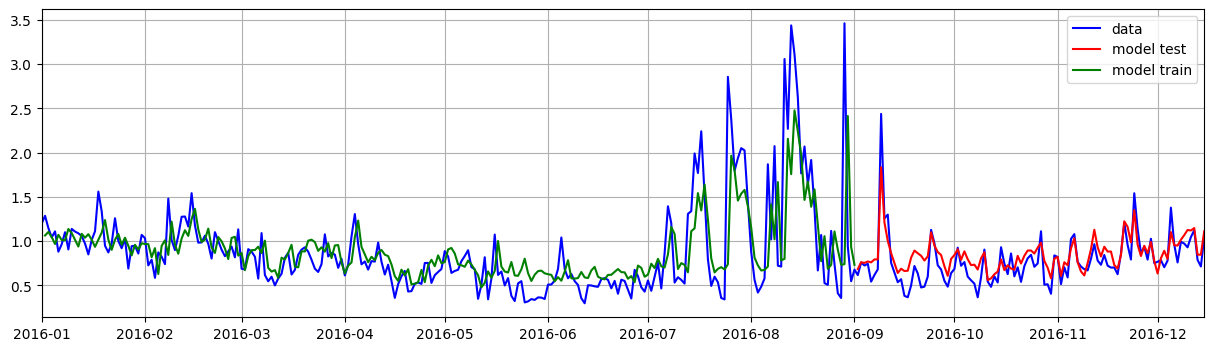

In [81]:
Y_pred_series = pd.Series(Y_pred.flatten().tolist(), index=data_daily['House overall'][size:-n_past].index)
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily['House overall'][n_past:size].index)
plt.figure(figsize=(15,4))
plt.plot(data_daily['House overall'][:-n_past], c='blue', label='data')
plt.plot(Y_pred_series, c='red', label='model test')
plt.plot(Train_pred_series, c='green', label='model train')
plt.legend()
plt.grid(), plt.margins(x=0);
Y_test = data_daily['House overall'][size:-n_past]

# calcolo errore
print('MSE: %.5f' % (mean_squared_error(Y_pred, Y_test)))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(Y_pred, Y_test)))
MAE = mean_absolute_error(Y_test, Y_pred)
MAPE = np.mean(np.abs(Y_pred[:,0] - Y_test.values)/np.abs(Y_test.values))
#MASE = np.mean(np.abs(Y_test - Y_pred))/(np.abs(np.diff(X_train)).sum()/(len(X_train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
#print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(Y_test, Y_pred))

In [82]:
d = {'Model' : ['Baseline', 'Arima_basic', 'Arima_dynamic', 'Sarima', 'Sarimax', 'LSTM_Univar', 'LSTM_Multivar'],
     'MSE': [0.071, 0.259, 0.069, 0.107, 0.101, 0.068, 0.022], 'RMSE': [0.266, 0.509, 0.263, 0.327, 0.317, 0.261, 0.15],
     'MAE': [0.177, 0.463, 0.176, 0.266, 0.243, 0.173, 0.11], 'MAPE': [0.236, 0.722, 0.229, 0.397, 0.363, 0.307, 0.173],
     'R^2': [0.077, -2.379, 0.094, -0.399, -0.318, 0.106, 0.7]}
df = pd.DataFrame(data=d).set_index('Model')
df

MSE   RMSE    MAE   MAPE    R^2
Model                                           
Baseline       0.071  0.266  0.177  0.236  0.077
Arima_basic    0.259  0.509  0.463  0.722 -2.379
Arima_dynamic  0.069  0.263  0.176  0.229  0.094
Sarima         0.107  0.327  0.266  0.397 -0.399
Sarimax        0.101  0.317  0.243  0.363 -0.318
LSTM_Univar    0.068  0.261  0.173  0.307  0.106
LSTM_Multivar  0.022  0.150  0.110  0.173  0.700

Anomaly detection

In [85]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    # Ensure series is a numeric Series, not a DataFrame with mixed types
    # This defensive check might be redundant if data_anom[cols] is always a single numeric Series
    # But it doesn't hurt.
    if isinstance(series, pd.DataFrame):
        # If it's a DataFrame, assume we want to plot the first column
        # Or, ideally, ensure only one numeric column is passed.
        # For this specific case, we know it's data_anom[['House overall']] which is a DataFrame.
        # So we should operate on each column.
        # However, your original intent seems to be to plot a single series,
        # so let's iterate if multiple are passed or ensure only one is.
        if len(series.columns) > 1:
            print("Warning: plotMovingAverage received a DataFrame with multiple columns. Plotting only the first one.")
        series_to_plot = series.iloc[:, 0] # Take the first column if it's a DataFrame
    else:
        series_to_plot = series # Already a Series

    if not pd.api.types.is_numeric_dtype(series_to_plot):
        print(f"Error: Series '{series_to_plot.name}' is not numeric. Cannot plot moving average.")
        return # Exit the function if not numeric

    rolling_mean = series_to_plot.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title(f"Moving average for {series_to_plot.name} with window size = {window}")
    plt.plot(rolling_mean, "r", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        # Ensure slicing for metrics is done on the rolling_mean and series_to_plot
        # The window size means the first 'window' values of rolling_mean are NaN
        valid_rolling_mean = rolling_mean[window:].dropna()
        valid_series = series_to_plot[window:].loc[valid_rolling_mean.index] # Align indices

        if not valid_series.empty and not valid_rolling_mean.empty:
            mae = mean_absolute_error(valid_series, valid_rolling_mean)
            deviation = np.std(valid_series - valid_rolling_mean)
            lower_bond = rolling_mean - (mae + scale * deviation)
            upper_bond = rolling_mean + (mae + scale * deviation)
            plt.plot(upper_bond, "g--" , label="Upper Bond / Lower Bond")
            plt.plot(lower_bond, "g--")

            # Having the intervals, find abnormal values
            if plot_anomalies:
                # Create an empty Series with the same index as the original series_to_plot
                # This ensures we're only creating a series for the anomalies, not a full DataFrame
                # with potentially problematic column names.
                anomalies = pd.Series(index=series_to_plot.index, dtype=float) # Or specify series_to_plot.dtype

                # Select anomalies where original series is outside the bonds
                # Ensure comparisons are made on aligned indices
                anomalies_lower_cond = series_to_plot < lower_bond
                anomalies_upper_cond = series_to_plot > upper_bond

                # Use .loc with the boolean conditions to assign values
                anomalies.loc[anomalies_lower_cond] = series_to_plot[anomalies_lower_cond]
                anomalies.loc[anomalies_upper_cond] = series_to_plot[anomalies_upper_cond]

                # Drop NaNs from anomalies before plotting to only plot actual anomalies
                plt.plot(anomalies.dropna(), "ro", markersize=5, label="Anomalies")
        else:
            print("Not enough valid data points for interval calculation and anomaly detection.")

    plt.plot(series_to_plot[window:], 'blue', label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True), plt.margins(x=0)
    plt.show()

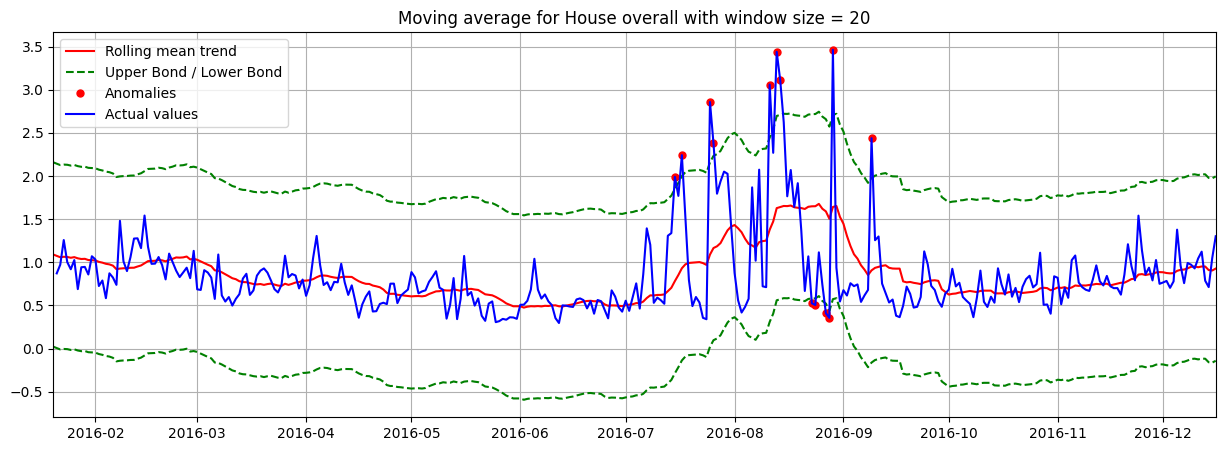

In [88]:
# Select only the numeric columns from 'data' before resampling
numeric_data = data.select_dtypes(include=np.number)

# Now, resample and calculate the mean ONLY on those numeric columns
data_anom = numeric_data.resample('d').mean()

# Your call to plotMovingAverage remains the same, as data_anom will now be clean
cols=['House overall']
plotMovingAverage(data_anom[cols], window=20, plot_intervals=True, plot_anomalies=True)

ARIMA

In [89]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_anom['House overall'], order=(2,1,1))
#model = sm.tsa.statespace.SARIMAX(train, order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  300.9797957377858


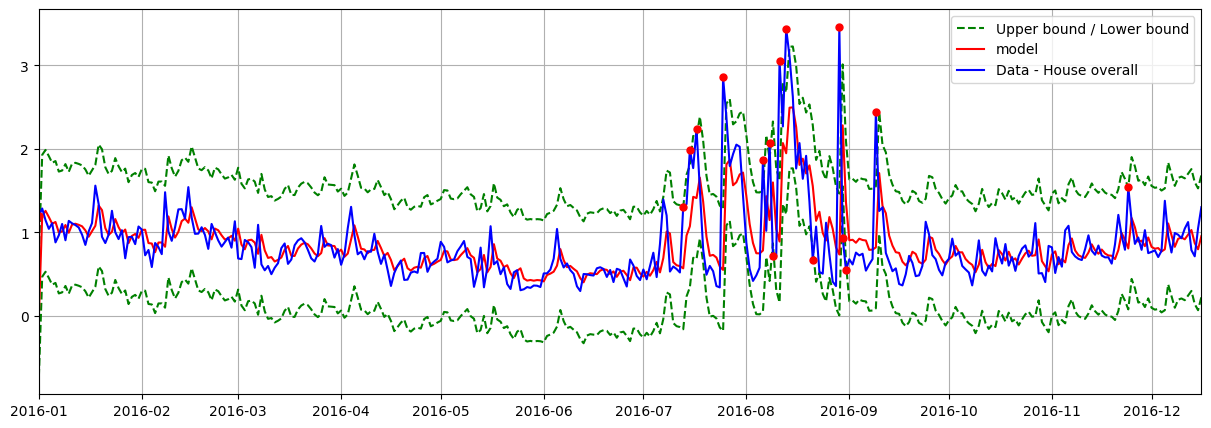

In [90]:
squared_errors = (model_fit.resid)
threshold = np.mean(squared_errors) + 1.96*np.std(squared_errors)
upper_bond = model_fit.predict(dynamic=False)+threshold
lower_bond = model_fit.predict(dynamic=False)-threshold
anomalies = data_anom['House overall'][(data_anom['House overall']<lower_bond)|(data_anom['House overall']>upper_bond)]

plt.figure(figsize=(15,5))
plt.plot(model_fit.predict(dynamic=False)+threshold, c='g', linestyle='--', label='Upper bound / Lower bound')
plt.plot(model_fit.predict(dynamic=False)-threshold, c='g', linestyle='--')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.plot(data_anom['House overall'], c='blue',label='Data - House overall')
plt.plot(anomalies, "ro", markersize=5)
plt.legend(), plt.grid(), plt.margins(x=0);

ARIMA v2

In [91]:
predictions = model_fit.predict(dynamic=False)

confidence = model_fit.get_prediction().conf_int(alpha=0.01)
#Errors = np.abs(data_anom['use'] - predictions)
Errors = np.sqrt(mean_squared_error(data_anom['House overall'], predictions))
Uncertainty = confidence['upper House overall'] - confidence['lower House overall']
Anomalies = data_anom['House overall'][(data_anom['House overall']> confidence['upper House overall'])|
                                  (data_anom['House overall'] < confidence['lower House overall'])]
#Anomalies = dati_anom['use'][Errors > Uncertainty]

In [92]:
Anomalies

time
2016-07-25    2.856820
2016-08-06    1.868336
2016-08-11    3.058458
2016-08-13    3.438249
2016-08-29    3.462383
2016-08-30    0.937388
2016-09-09    2.438020
Name: House overall, dtype: float64

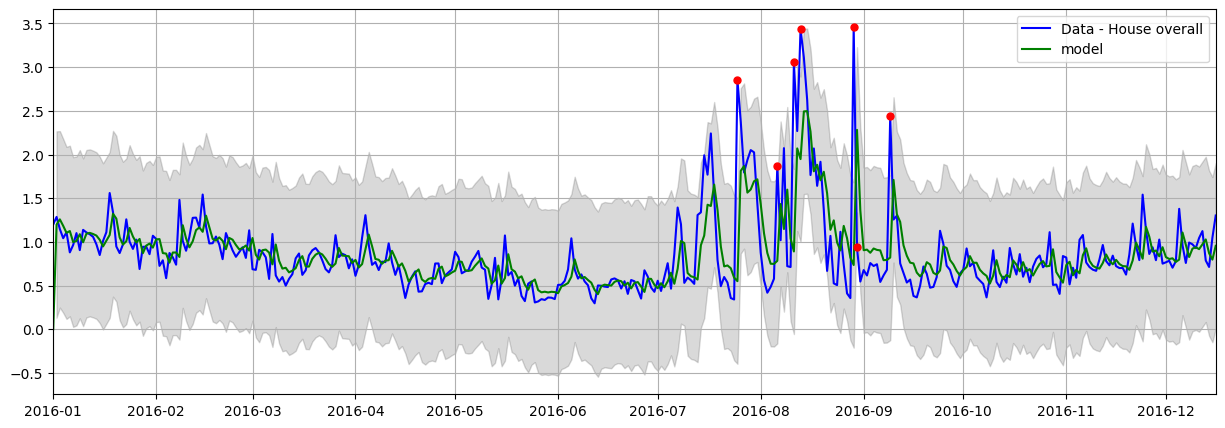

In [93]:
plt.figure(figsize=(15,5))
plt.plot(data_anom['House overall'], c='blue',label='Data - House overall')
plt.plot(predictions, c='green', label='model')
plt.fill_between(confidence.index[1:],confidence['lower House overall'][1:],
                 confidence['upper House overall'][1:], color='k', alpha=.15)
plt.plot(Anomalies, "ro", markersize=5)
plt.legend()
plt.grid(), plt.margins(x=0);
#print(model_fit.summary())

LSTM

In [94]:
#Define dataframe - Consumption "House overall" and weather data to include in the forecasting
data_daily = data_anom[['House overall', 'temperature', 'Furnace', 'Living room', 'Barn', 'humidity',
                   'apparentTemperature', 'pressure', 'cloudCover','windBearing', 'precipIntensity',
                   'dewPoint', 'precipProbability']]

In [95]:
#Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_daily[data_daily.columns[1:]] = scaler.fit_transform(data_daily[data_daily.columns[1:]])
scaler_target = MinMaxScaler(feature_range=(0, 1))
data_daily[['House overall']] = scaler_target.fit_transform(data_daily[['House overall']])

In [96]:
#Build the arrays train e test, sequencing the trace like in the univariate case, but this time we also include
#weather.

X, Y = [], []
n_past=1    #timesteps
n_future=1  #punti da prevedere
for i in range(n_past, len(data_daily)-n_future+1):
    X.append(data_daily.iloc[i-n_past:i, 0:data_daily.shape[1]])
    Y.append(data_daily.iloc[i+n_future-1:i+n_future, 0])

X, Y = np.array(X), np.array(Y)

print('X shape', X.shape)
print('Y shape', Y.shape)

X shape (350, 1, 13)
Y shape (350, 1)


In [97]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences = False, input_shape=(X.shape[1], X.shape[2])))
#model.add(LSTM(50, activation='relu', return_sequences = True))
#model.add(LSTM(25, activation='relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [98]:
model_fit = model.fit(X, Y, epochs=80, verbose=0)
Train_pred = model.predict(X, verbose=0)

In [99]:
#Invert scaling
data_daily[['House overall']] = scaler_target.inverse_transform(data_daily[['House overall']])
Train_pred = scaler_target.inverse_transform(Train_pred)

In [100]:
Train_pred_series = pd.Series(Train_pred.flatten().tolist(), index=data_daily['House overall'][n_past:].index)

mae = mean_absolute_error(data_daily['House overall'][1:], Train_pred_series)
deviation = np.std(data_daily['House overall'][1:] - Train_pred_series)
lower_bond = Train_pred_series - (mae + 2.576 * deviation)
upper_bond = Train_pred_series + (mae + 2.576 * deviation)
uncertainty = upper_bond-lower_bond
#anomalies = data_daily['House overall'][1:][mae > uncertainty]
anomalies = data_anom['House overall'][1:][(data_anom['House overall'][1:] > upper_bond)|(data_anom['House overall'][1:] < lower_bond)]

In [101]:
deviation

0.34857191155533196

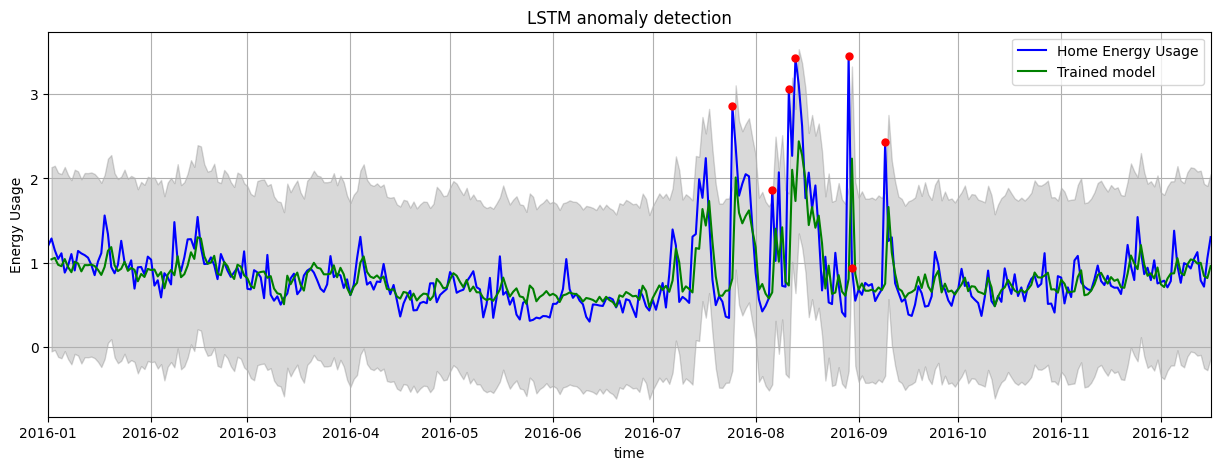

In [102]:
plt.figure(figsize=(15,5))
plt.plot(data_daily['House overall'], c='blue', label='Home Energy Usage')
plt.plot(Train_pred_series, c='green', label='Trained model')
plt.fill_between(lower_bond.index ,lower_bond, upper_bond, color='k', alpha=.15)
plt.plot(anomalies, "ro", markersize=5)
plt.legend()
plt.title("LSTM anomaly detection")
plt.xlabel("time")
plt.ylabel("Energy Usage")
plt.grid(), plt.margins(x=0);